# Sea ice volume

In [1]:
import glob
import dask.distributed as dsk
import xesmf as xe
from pathlib import Path
import numpy as np
import xarray as xr

import xgcm
import cf_xarray

# For plotting
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import pyproj
import glob

import warnings # ignore these warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)

/g/data/xp65/public/apps/med_conda/envs/analysis3-25.10/lib/python3.11/site-packages/distributed/diagnostics/nvml.py:14: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml


In [2]:
from dask.distributed import Client
client = Client(threads_per_worker=1)
client

/g/data/xp65/public/apps/med_conda/envs/analysis3-25.10/lib/python3.11/site-packages/distributed/diagnostics/nvml.py:14: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml
/g/data/xp65/public/apps/med_conda/envs/analysis3-25.10/lib/python3.11/site-packages/distributed/diagnostics/nvml.py:14: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml
/g/data/xp65/public/apps/med_conda/envs/analysis3-25.10/lib/python3.11/site-packages/distributed/diagnostics/nvml.py:14: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that i

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/37195/status,
Dashboard: /proxy/37195/status,Workers: 28
Total threads: 28,Total memory: 125.19 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41535,Workers: 0
Dashboard: /proxy/37195/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:40833,Total threads: 1
Dashboard: /proxy/44315/status,Memory: 4.47 GiB
Nanny: tcp://127.0.0.1:33767,


In [7]:
pan_C = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/ice_volume_time_C_prescribed_Pan01.nc')
pan_M = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/ice_volume_time_M_prescribed_Pan01.nc')
pan_anom = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/ice_volume_time_anom_prescribed_Pan01.nc')

In [8]:
acc_C = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/ice_volume_time_C_prescribed_ACCESS.nc')
acc_M = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/ice_volume_time_M_prescribed_ACCESS.nc')
acc_anom = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/ice_volume_time_anom_prescribed_ACCESS.nc')

In [9]:
# Colours
from matplotlib.colors import to_rgba

colors = {'pan01_res': '#0000a2',
          'pan005_res': '#E84141',
          'pan01_pre' : '#18669C',
          'access_pre': 'tab:orange'}

def lighten(color, amount=0.4):
    c = np.array(to_rgba(color))
    return tuple(c[:3] + (1 - c[:3]) * amount)

In [10]:
siv_acc_anom = siv_acc_anom.to_series()
siv_pan_anom = siv_pan_anom.to_series()

siv_pan_anom_new = siv_pan_anom['2001-01-01':'2010-12-16']
siv_acc_anom_new = siv_acc_anom['1910-01-01':'1919-12-16']

siv_pan_anom_new.index = range(1, len(siv_pan_anom_new)+1)
siv_acc_anom_new.index = range(1, len(siv_acc_anom_new)+1)

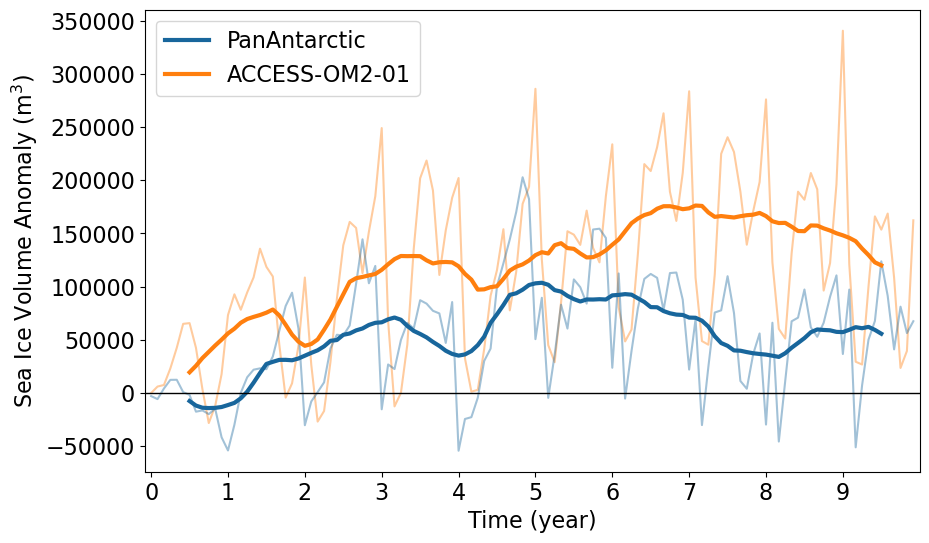

In [25]:
plt.rcParams['font.size'] = 16

# --- Create figure and axes, specify size ---
fig, ax = plt.subplots(figsize=(10, 6))  # width=12, height=6 inches (change as needed)

# --- Plot original anomaly ---
ax.plot(siv_acc_anom_new.index, siv_acc_anom_new.values, alpha=0.4, color=colors['access_pre'])
ax.plot(siv_pan_anom_new.index, siv_pan_anom_new.values, alpha=0.4, color=colors['pan01_pre'])

# --- Add rolling mean (12-month window) ---
siv_pan_anom_rm = siv_pan_anom_new.rolling(window=12, center=True).mean()
siv_acc_anom_rm = siv_acc_anom_new.rolling(window=12, center=True).mean()

ax.plot(siv_pan_anom_rm.index, siv_pan_anom_rm.values,
        label='PanAntarctic', linewidth=3, color=colors['pan01_pre'])
ax.plot(siv_acc_anom_rm.index, siv_acc_anom_rm.values,
        label='ACCESS-OM2-01', linewidth=3, color=colors['access_pre'])

# --- X ticks as years 0–9 ---
positions = range(1, 121, 12)  # ticks every 12 months
labels = [str(j) for j in range(0, 10)]
ax.set_xticks(positions)
ax.set_xticklabels(labels)
ax.set_xlim(0,121)

# --- Labels, legend, and horizontal line ---
ax.set_ylabel('Sea Ice Volume Anomaly (m$^{3}$)')
ax.set_xlabel('Time (year)')
ax.legend()
ax.axhline(0, color='k', linewidth=1, linestyle='-')

# --- Save figure ---
fig.savefig("/g/data/g40/kc5856/thesis_figures/intermodel_seaice_volume.png",
            dpi=300, bbox_inches='tight')

In [32]:
pan_C_rm = pan_C.rolling(time=12, center=True).mean()
pan_M_rm = pan_M.rolling(time=12, center=True).mean()

acc_C_rm = acc_C.rolling(time=12, center=True).mean()
acc_M_rm = acc_M.rolling(time=12, center=True).mean()

In [44]:
pan_C_rm_mean = pan_C_rm.sel(time=slice('2006-01-01','2010-12-31')).mean(dim='time')
pan_M_rm_mean = pan_M_rm.sel(time=slice('2006-01-01','2010-12-31')).mean(dim='time')

acc_C_rm_mean = acc_C_rm.sel(time=slice('1915-01-01','1919-12-31')).mean(dim='time')
acc_M_rm_mean = acc_M_rm.sel(time=slice('1915-01-01','1919-12-31')).mean(dim='time')

In [45]:
pan_M_rm_mean/pan_C_rm_mean

<xarray.DataArray ()> Size: 8B
array(1.00653793)
Coordinates:
    z_l      float64 8B 0.5413

In [46]:
acc_M_rm_mean/acc_C_rm_mean

<xarray.DataArray ()> Size: 8B
array(1.01026418)
Coordinates:
    st_ocean  float64 8B 0.5413

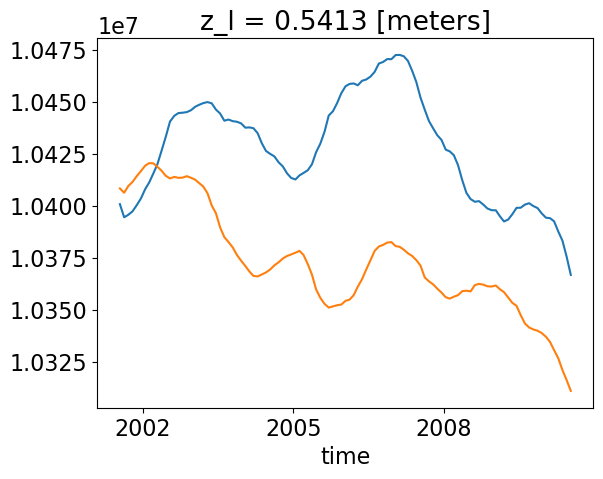

In [34]:
pan_M_rm.plot()
pan_C_rm.plot()